# **Online Retial Dataset**

You have a dataset contains info. of customers purchase from an online retail.
- InvoiceNo
- StockCode
- Description
- Quantity
- InvoiceDate
- UnitPrice
- CustomerID
- Country

# **Instructions**
- Explore the dataset.
- Calculate the following (RFM):
>- Recency: how recently a customer has purchased. (#days)
>- Frequency: how often they purchase
>- Monetary: how much the customer spends
- Use K-means clustering algorithm to cluster each of the RFM values separately
- Order the groups so that the most recent and frequent customers with the highest monetary have the higher values then the rest follows.
- Identify the customer segments with what you see feasible.
- Use graphs to visualize the output of your steps.

# Importing

In [ ]:
#data
import numpy as np
import pandas as pd
#visulaization
import matplotlib.pyplot as plt
import seaborn as sns
#kmeans
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [ ]:
or_df=pd.read_csv('Online Retail - United Kingdom.csv')

# Preprosition Data

In [ ]:
or_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
11647,537374,22865,HAND WARMER OWL DESIGN,2.0,2010-12-06 12:55:00,2.10,17259.0,United Kingdom
11648,537374,22549,PICTURE DOMINOES,1.0,2010-12-06 12:55:00,1.45,17259.0,United Kingdom
11649,537374,22906,12 MESSAGE CARDS WITH ENVELOPES,1.0,2010-12-06 12:55:00,1.65,17259.0,United Kingdom
11650,537374,22945,CHRISTMAS METAL TAGS ASSORTED,6.0,2010-12-06 12:55:00,0.85,17259.0,United Kingdom


In [ ]:
or_df.columns = or_df.columns.str.strip()

In [ ]:
or_df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [ ]:
or_df.StockCode.unique()

array(['85123A', '71053', '84406B', ..., '85020', '20861', '21827'],
      dtype=object)

In [ ]:
or_df["StockCode"].nunique()

2139

In [ ]:
or_df.isnull().sum()



InvoiceNo         0
StockCode         0
Description      45
Quantity          1
InvoiceDate       1
UnitPrice         1
CustomerID     3495
Country           1
dtype: int64

In [ ]:
or_df.isnull().any()
or_df.isnull().sum()

InvoiceNo         0
StockCode         0
Description      45
Quantity          1
InvoiceDate       1
UnitPrice         1
CustomerID     3495
Country           1
dtype: int64

In [ ]:
or_df.dropna(inplace=True)

In [ ]:
or_df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

Ordering of Stock code

In [ ]:
or_df["StockCode"].value_counts().sort_values(ascending=False).head()

22633     63
22632     63
22866     62
85123A    58
22086     51
Name: StockCode, dtype: int64

Remove Cancelled Transactions

In [ ]:
or_df = or_df[~or_df["InvoiceNo"].str.contains("C", na = False)]

In [ ]:
or_df["TotalPrice"] = or_df["Quantity"] * or_df["UnitPrice"]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
or_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


# RFM

In [ ]:
or_df["InvoiceDate"].max()

'2010-12-06 12:55:00'

In [ ]:
# New Attribute : Monetary

or_df['Amount'] = or_df['Quantity']*or_df['UnitPrice']
rfm_m = or_df.groupby('CustomerID')['Amount'].sum()
rfm_m = rfm_m.reset_index()
rfm_m.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,CustomerID,Amount
0,12747.0,358.56
1,12748.0,1108.67
2,12838.0,390.79
3,12841.0,505.99
4,12855.0,38.10


In [ ]:
rfm_f = or_df.groupby('CustomerID')['InvoiceNo'].count()
rfm_f = rfm_f.reset_index()
rfm_f.columns = ['CustomerID', 'Frequency']
rfm_f.head()

,CustomerID,Frequency
0,12747.0,7
1,12748.0,234
2,12838.0,59
3,12841.0,47
4,12855.0,3


In [ ]:
import datetime as dt
today_date = dt.datetime.today

In [ ]:
or_df['InvoiceDate'] = pd.to_datetime(or_df['InvoiceDate'],format='%Y-%m-%d')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
max_date = max(or_df['InvoiceDate'])
max_date

Timestamp('2010-12-06 12:55:00')

In [ ]:
or_df['Recency'] = max_date - or_df['InvoiceDate']
or_df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Amount,Recency
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,15.30,5 days 04:29:00
1,536365,71053,WHITE METAL LANTERN,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,20.34,5 days 04:29:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,22.00,5 days 04:29:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,20.34,5 days 04:29:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,20.34,5 days 04:29:00


In [ ]:
rfm_p = or_df.groupby('CustomerID')['Recency'].min()
rfm_p = rfm_p.reset_index()
rfm_p.head()

,CustomerID,Recency
0,12747.0,0 days 21:17:00
1,12748.0,0 days 00:32:00
2,12838.0,5 days 00:58:00
3,12841.0,1 days 00:40:00
4,12855.0,4 days 03:18:00


In [ ]:
rfm_p['Recency'] = rfm_p['Recency'].dt.days
rfm_p.head()

,CustomerID,Recency
0,12747.0,0
1,12748.0,0
2,12838.0,5
3,12841.0,1
4,12855.0,4


In [ ]:
rfm = pd.merge(rfm_m, rfm_f, on='CustomerID', how='inner')
rfm = pd.merge(rfm, rfm_p, on='CustomerID', how='inner')
rfm.columns = ['CustomerID', 'Amount', 'Frequency', 'Recency']
rfm.head()

,CustomerID,Amount,Frequency,Recency
0,12747.0,358.56,7,0
1,12748.0,1108.67,234,0
2,12838.0,390.79,59,5
3,12841.0,505.99,47,1
4,12855.0,38.10,3,4


In [ ]:
groupby_invoice = pd.DataFrame(or_df.groupby('InvoiceNo')['StockCode'].nunique())
groupby_invoice.columns = ['Number of products per Order']
groupby_invoice.describe()

,Number of products per Order
count,418.000000
mean,18.354067
std,19.134611
min,1.000000
25%,5.000000
50%,13.000000
75%,24.750000
max,122.000000


In [ ]:
rfm["Recency_score"] = pd.qcut(rfm['Recency'], 5, labels=[5, 4, 3, 2, 1])


rfm["Frequency_score"] = pd.qcut(rfm['Frequency'].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])

rfm["Monetary_score"] = pd.qcut(rfm['Amount'], 5, labels=[1, 2, 3, 4, 5])


rfm["RFM_SCORE"] = (rfm['Recency_score'].astype(str) +
                    rfm['Frequency_score'].astype(str))

ValueError: ignored

In [ ]:
rfm.groupby("RFM_SCORE")[['Amount', 'Frequency', 'Recency']].mean()

KeyError: ignored

In [ ]:
rfm.head()

,CustomerID,Amount,Frequency,Recency
0,12747.0,358.56,7,0
1,12748.0,1108.67,234,0
2,12838.0,390.79,59,5
3,12841.0,505.99,47,1
4,12855.0,38.10,3,4


# K-Means

In [ ]:
or_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Amount,Recency
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,15.30,5 days 04:29:00
1,536365,71053,WHITE METAL LANTERN,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,20.34,5 days 04:29:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,22.00,5 days 04:29:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,20.34,5 days 04:29:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,20.34,5 days 04:29:00


In [ ]:
rfm_df = rfm[['Amount', 'Frequency', 'Recency']]

# Instantiate
scaler = StandardScaler()

# fit_transform
rfm_df_scaled = scaler.fit_transform(rfm_df)
rfm_df_scaled.shape

(317, 3)

In [ ]:
rfm_df_scaled = pd.DataFrame(rfm_df_scaled)
rfm_df_scaled.columns = ['Amount', 'Frequency', 'Recency']
rfm_df_scaled.head()

,Amount,Frequency,Recency
0,-0.136660,-0.604419,-1.399445
1,0.753823,6.827808,-1.399445
2,-0.098399,1.098118,1.422591
3,0.038359,0.705224,-0.835038
4,-0.517090,-0.735383,0.858184


In [ ]:
sts = StandardScaler()
x = sts.fit_transform(rfm_df_scaled)

In [ ]:
inertias_ =[]

In [ ]:
for k in range(1,25):
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(x)
  inertias_.append(kmeans.inertia_)

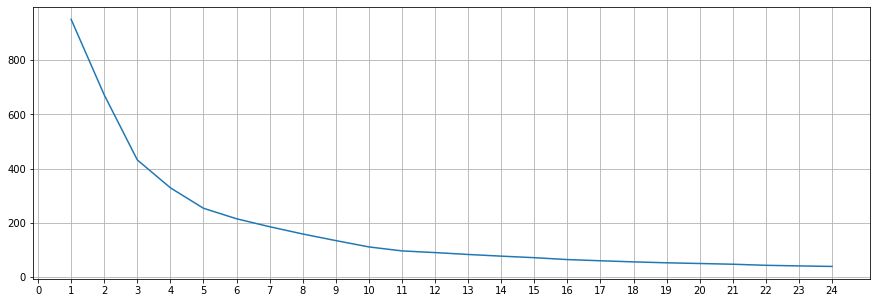

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(range(1,25), inertias_)
plt.xticks(range(0, 25))
plt.grid(True)

In [ ]:
kmeans = KMeans(n_clusters=4).fit(x)
kmeans.labels_

array([2, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 2, 1, 2, 0, 0, 2,
       0, 0, 0, 0, 2, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 2, 0,
       0, 0, 0, 0, 0, 2, 3, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 0, 0,
       2, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 2, 2, 1,
       0, 0, 0, 1, 0, 0, 0, 2, 2, 1, 0, 2, 0, 2, 2, 2, 2, 0, 0, 0, 2, 0,
       0, 2, 2, 2, 2, 2, 3, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 1, 0,
       2, 0, 2, 1, 2, 0, 2, 0, 0, 0, 2, 2, 2, 1, 0, 0, 0, 0, 0, 0, 2, 2,
       0, 0, 0, 2, 1, 0, 0, 2, 0, 2, 1, 1, 2, 2, 2, 2, 0, 0, 2, 0, 0, 2,
       2, 3, 2, 0, 0, 2, 2, 0, 2, 2, 0, 0, 3, 0, 2, 1, 0, 1, 1, 2, 2, 2,
       2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2,
       2, 0, 1, 2, 0, 0, 2, 2, 0, 2, 2, 2, 0, 0, 2, 1, 2, 0, 0, 0, 1, 2,
       2, 0, 0, 1, 2, 2, 0, 0, 0, 3, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 2, 0, 1, 3, 0, 2, 2, 2,
       0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 2, 0, 0, 2, 0,

In [ ]:
rfm['label'] = kmeans.predict(rfm_df_scaled)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KMeans was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [ ]:
rfm.groupby(["label"])[['Recency','Frequency', 'Amount']].mean()

,Recency,Frequency,Amount
label,,,
0,3.836257,15.795322,358.396667
1,2.000000,87.035714,653.368571
2,0.544643,22.160714,326.590804
3,2.166667,75.166667,5666.248333


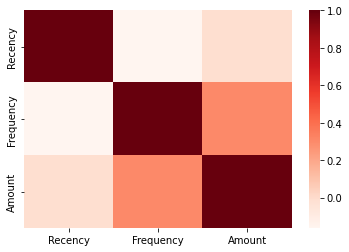

In [ ]:
sns.heatmap(rfm[['Recency','Frequency', 'Amount']].corr(),cmap="Reds")

In [ ]:
df_segm_analysis = rfm.groupby(['label']).mean()
df_segm_analysis

,CustomerID,Amount,Frequency,Recency
label,,,,
0,15609.608187,358.396667,15.795322,3.836257
1,15823.964286,653.368571,87.035714,2.000000
2,15810.919643,326.590804,22.160714,0.544643
3,16051.333333,5666.248333,75.166667,2.166667


In [ ]:
rfm2 = pd.merge(rfm, or_df, on='CustomerID', how='inner')
df_segm_analysis = rfm2.groupby(['label']).mean()
df_segm_analysis

,CustomerID,Amount_x,Frequency,Recency_x,Quantity,UnitPrice,TotalPrice,Amount_y
label,,,,,,,,
0,15741.328767,393.701159,26.152166,3.862273,13.699741,3.275494,22.690052,22.690052
1,15594.337300,702.906570,103.029545,1.757899,3.848174,2.715794,7.506902,7.506902
2,15737.385576,341.819565,33.831587,0.501209,7.651491,3.036539,14.737377,14.737377
3,16949.740576,6019.064590,211.789357,2.833703,38.239468,3.319911,75.382461,75.382461


In [ ]:
 df_segm_analysis.rename({0:'Need attention',
                         1:'Regular Customers',
                         2:'Recent Customers',
                         3:'Loyal Customers'})

,CustomerID,Amount_x,Frequency,Recency_x,Quantity,UnitPrice,TotalPrice,Amount_y
label,,,,,,,,
Need attention,15741.328767,393.701159,26.152166,3.862273,13.699741,3.275494,22.690052,22.690052
Regular Customers,15594.337300,702.906570,103.029545,1.757899,3.848174,2.715794,7.506902,7.506902
Recent Customers,15737.385576,341.819565,33.831587,0.501209,7.651491,3.036539,14.737377,14.737377
Loyal Customers,16949.740576,6019.064590,211.789357,2.833703,38.239468,3.319911,75.382461,75.382461
